<a href="https://colab.research.google.com/github/reycongi47/Fresh-Graduate-Academy-Final-Project/blob/main/Cindy_Felcia_Turnip_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [1]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [2]:
import io
import pandas as pd
df_train = pd.read_csv(io.BytesIO(uploaded['train.csv']))
df_test = pd.read_csv(io.BytesIO(uploaded['test.csv']))

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis (EDA)

In [4]:
df_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [5]:
def overview(df, message):
  print(f'{message}:\n')
  print('Rows:', df.shape[0])
  print('\nColumns:', df.shape[1])
  print('\nThe list of Columns:')
  print( df.columns.tolist())
  print('\nMissing Value:', df.isna().sum().values.sum())
  print('\nList of Missing Value:')
  print(df.isna().sum())
  print('\nDuplicated Value:', df.duplicated().sum())
  print('\nUnique Value:')
  print(df.nunique())

In [6]:
overview(df_train, 'Overview of Training Data')

Overview of Training Data:

Rows: 4250

Columns: 20

The list of Columns:
['state', 'account_length', 'area_code', 'international_plan', 'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls', 'churn']

Missing Value: 0

List of Missing Value:
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls              

Luckliy in the data training tets we have nothing of missing value and duplicated value so we can go over to search the corellation of these features and target.

In [7]:
overview(df_test, 'Overview of Test Data')

Overview of Test Data:

Rows: 750

Columns: 20

The list of Columns:
['id', 'state', 'account_length', 'area_code', 'international_plan', 'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']

Missing Value: 0

List of Missing Value:
id                               0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
tota

In the data test also doesn't have any missing value and duplicated value, a clean data.

Next we have to analyzing per coloumn and the corellation of the features with the target. which columns we going to use and which columns we can drop. First I will write the information per columns:
*   state: US State
*   account_length: the total amount of months customers in telco provider
*   area_code: Area Code
*   International_plan: Customer who have international service plan
*   voice_mail_plan: Customer who have voice mail plan
*   number_vmail_messages: Total voice mail messages
*   total_day_minutes: Total minutes on day's call
*   total_day_calls: Total day's call
*   total_day_charge: Total charge from day's call
*   total_eve_minutes: Total minutes on evening's call
*   total_eve_calls: Total evening's call
*   total_eve_charge: Total charge from evening's call
*   total_night_minutes: Total minutes on night's call
*   total_night_calls: Total night's call
*   total_night_charge: Total charge from night's call
*   total_intl_minutes: Total minutes on international's call
*   total_intl_calls: Total international's call
*   total_intl_charge: Total charge from international's call
*   number_customer_service_calls: Total call's to customer service
*   churn: Customer churn (or in this case the customer who decided to continue use telco provider or not)

So from all these columns, the target we're going to predicted is churn. We predict if these customers will continue in telco provider or not.






In [8]:
#info of training dataset
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [9]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
account_length,4250.0,100.236235,39.698401,1.0,73.0000,100.00,127.0000,243.00
number_vmail_messages,4250.0,7.631765,13.439882,0.0,0.0000,0.00,16.0000,52.00
total_day_minutes,4250.0,180.259600,54.012373,0.0,143.3250,180.45,216.2000,351.50
total_day_calls,4250.0,99.907294,19.850817,0.0,87.0000,100.00,113.0000,165.00
total_day_charge,4250.0,30.644682,9.182096,0.0,24.3650,30.68,36.7500,59.76
total_eve_minutes,4250.0,200.173906,50.249518,0.0,165.9250,200.70,233.7750,359.30
total_eve_calls,4250.0,100.176471,19.908591,0.0,87.0000,100.00,114.0000,170.00
total_eve_charge,4250.0,17.015012,4.271212,0.0,14.1025,17.06,19.8675,30.54
total_night_minutes,4250.0,200.527882,50.353548,0.0,167.2250,200.45,234.7000,395.00
total_night_calls,4250.0,99.839529,20.093220,0.0,86.0000,100.00,113.0000,175.00


In [10]:
df_train.describe(include=["object"]).T

,count,unique,top,freq
state,4250,51,WV,139
area_code,4250,3,area_code_415,2108
international_plan,4250,2,no,3854
voice_mail_plan,4250,2,no,3138
churn,4250,2,no,3652


In [11]:
#we will see churn columns, who is continue or not.
df_train.churn.value_counts()

no     3652
yes     598
Name: churn, dtype: int64

So, there are 598 customers who are continuing service in telco provider, and 3652 customers who decided to stop the service in telco provider. the graphic we can see below.

In [12]:
df_train["churn"].value_counts(normalize=True)

no     0.859294
yes    0.140706
Name: churn, dtype: float64

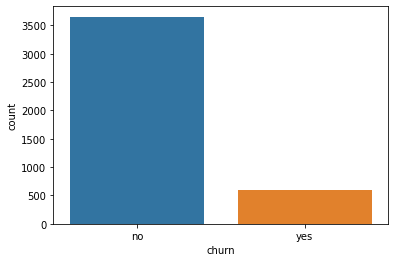

In [13]:
sns.countplot(data=df_train, x='churn')

Next, we can see the correlation between these numerical columns below

In [14]:
df_train.corr()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
account_length,1.000000,-0.006626,-0.001612,0.023002,-0.001613,-0.010326,0.005535,-0.010322,-0.009916,-0.001846,-0.009942,0.004539,0.013690,0.004494,0.001002
number_vmail_messages,-0.006626,1.000000,0.002000,-0.006920,0.001994,0.010725,0.003593,0.010736,0.018308,0.001977,0.018300,0.005220,0.006585,0.005249,-0.015303
total_day_minutes,-0.001612,0.002000,1.000000,0.000747,1.000000,-0.013248,0.005986,-0.013258,0.010049,-0.004812,0.010036,-0.021369,0.003859,-0.021291,-0.002925
total_day_calls,0.023002,-0.006920,0.000747,1.000000,0.000751,0.008661,0.003739,0.008663,0.002206,-0.004815,0.002200,0.008834,0.009377,0.008909,-0.015845
total_day_charge,-0.001613,0.001994,1.000000,0.000751,1.000000,-0.013247,0.005985,-0.013257,0.010053,-0.004816,0.010040,-0.021374,0.003853,-0.021296,-0.002932
total_eve_minutes,-0.010326,0.010725,-0.013248,0.008661,-0.013247,1.000000,0.003101,1.000000,-0.014018,0.011973,-0.014031,-0.003509,0.012239,-0.003460,-0.010063
total_eve_calls,0.005535,0.003593,0.005986,0.003739,0.005985,0.003101,1.000000,0.003120,0.008425,-0.011929,0.008441,-0.013096,0.004949,-0.013145,0.006956
total_eve_charge,-0.010322,0.010736,-0.013258,0.008663,-0.013257,1.000000,0.003120,1.000000,-0.014022,0.011971,-0.014035,-0.003512,0.012239,-0.003463,-0.010071
total_night_minutes,-0.009916,0.018308,0.010049,0.002206,0.010053,-0.014018,0.008425,-0.014022,1.000000,0.023815,0.999999,-0.000113,-0.024280,-0.000047,-0.013771
total_night_calls,-0.001846,0.001977,-0.004812,-0.004815,-0.004816,0.011973,-0.011929,0.011971,0.023815,1.000000,0.023798,0.001093,0.003851,0.001054,-0.008893


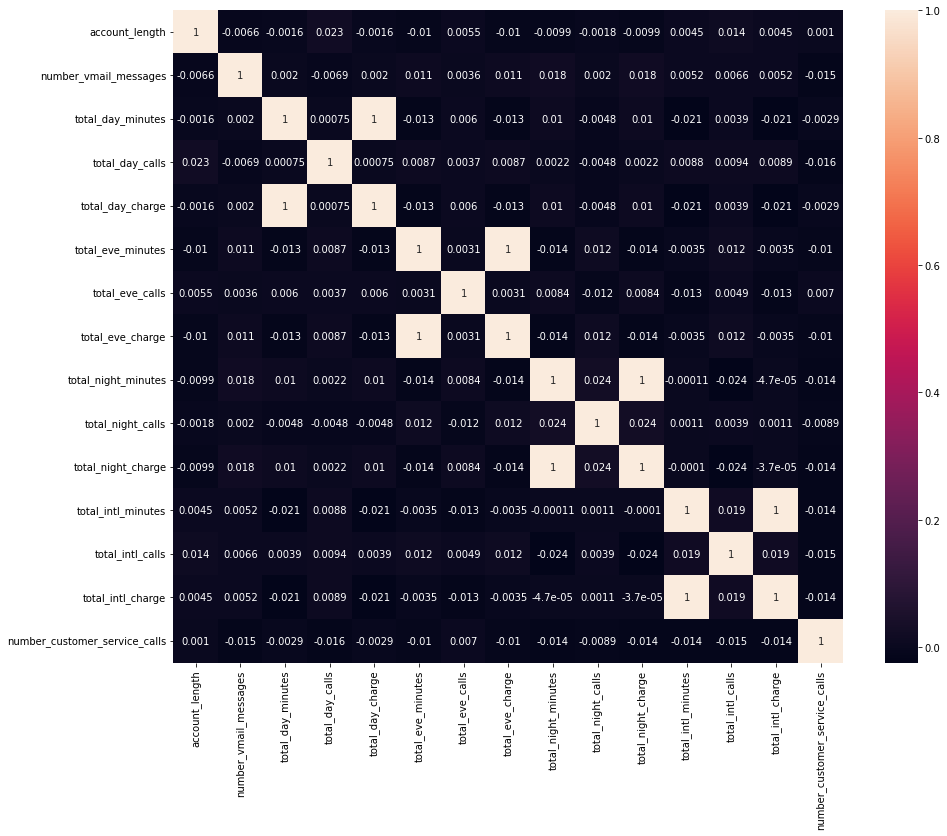

In [15]:
# We can also use heatmap corellation to see in the graph version
plt.figure(figsize=(15,12))
sns.heatmap(df_train.corr(),annot=True)
plt.show()

We can see from the correlation table and heatmap graph that there are strong correlation (1) between two columns. There are:
*   total_day_minutes & total_day_charge
*   total_eve_minutes & total_eve_charge 
*   total_night_minutes & total_night_charge
*   total_intl_minutes & total_intl_charge

So, we only have to choose one of them. I will chose these columns
*   total_day_minutes 
*   total_eve_minutes 
*   total_night_minutes 
*   total_intl_minutes

I will delete 'charge' columns in data cleaning part

**Next plot graph between features and target columns**

In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [17]:
df_train_num = df_train.select_dtypes(include = ['float64', 'int64'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe12afd2a10>,
      dtype=object)

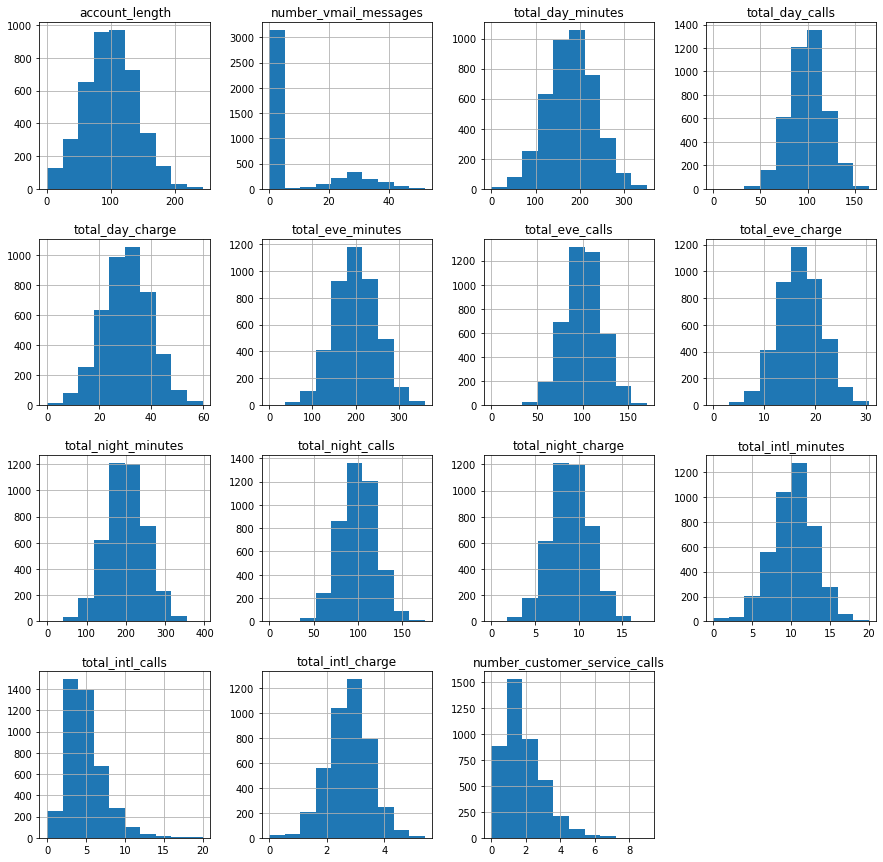

In [18]:
df_train.hist(figsize=(15,15))

In [19]:
def bar_plot(data):
  plt.figure(figsize = (20,170))
  l_row = 50
  l_pos = 1
  for col in df_train_num:
    plt.subplot(l_row, 4, l_pos)
    sns.barplot(x='churn', y=col, data=data)
    l_pos = l_pos + 1
  plt.tight_layout()
  return(plt.show())


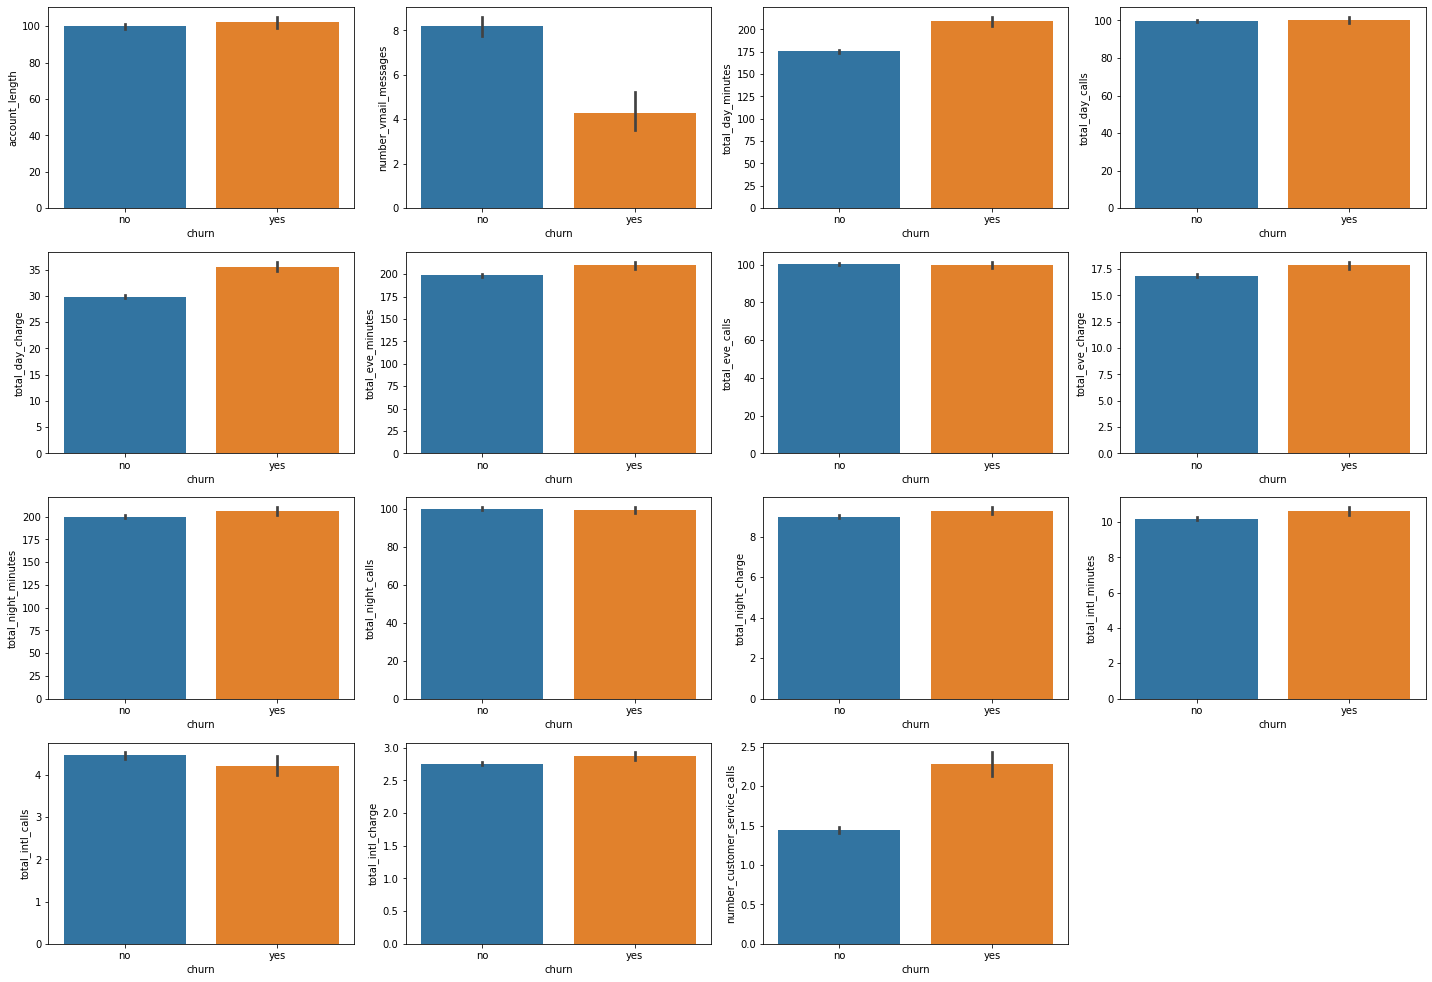

In [20]:
bar_plot(df_train)

In [21]:
df_totalcharge= df_train['total_day_charge'] + df_train['total_eve_charge'] + df_train['total_night_charge'] + df_train['total_intl_charge']

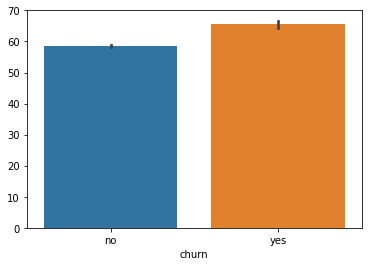

In [22]:
sns.barplot(x='churn',y=df_totalcharge, data = df_train)

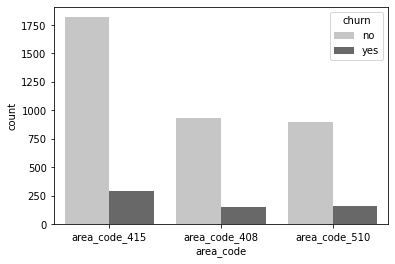

In [23]:
sns.countplot(df_train['area_code'], hue=df_train['churn'], palette = "Greys")
plt.show()

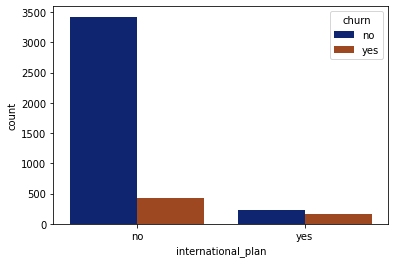

In [24]:
sns.countplot(df_train['international_plan'], hue=df_train['churn'], palette = "dark")
plt.show()

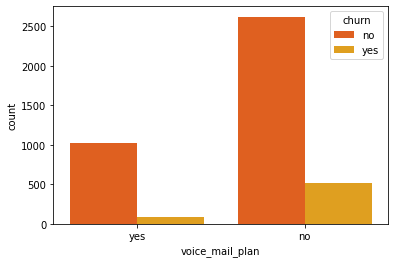

In [25]:
sns.countplot(df_train['voice_mail_plan'], hue=df_train['churn'], palette = "autumn")
plt.show()

In [26]:
def box_plot(data):
  plt.figure(figsize = (20,170))
  l_row = 50
  l_pos = 1
  for col in df_train_num:
    plt.subplot(l_row, 4, l_pos)
    sns.boxplot(y=col, data=data)
    l_pos = l_pos + 1
  plt.tight_layout()
  return(plt.show())

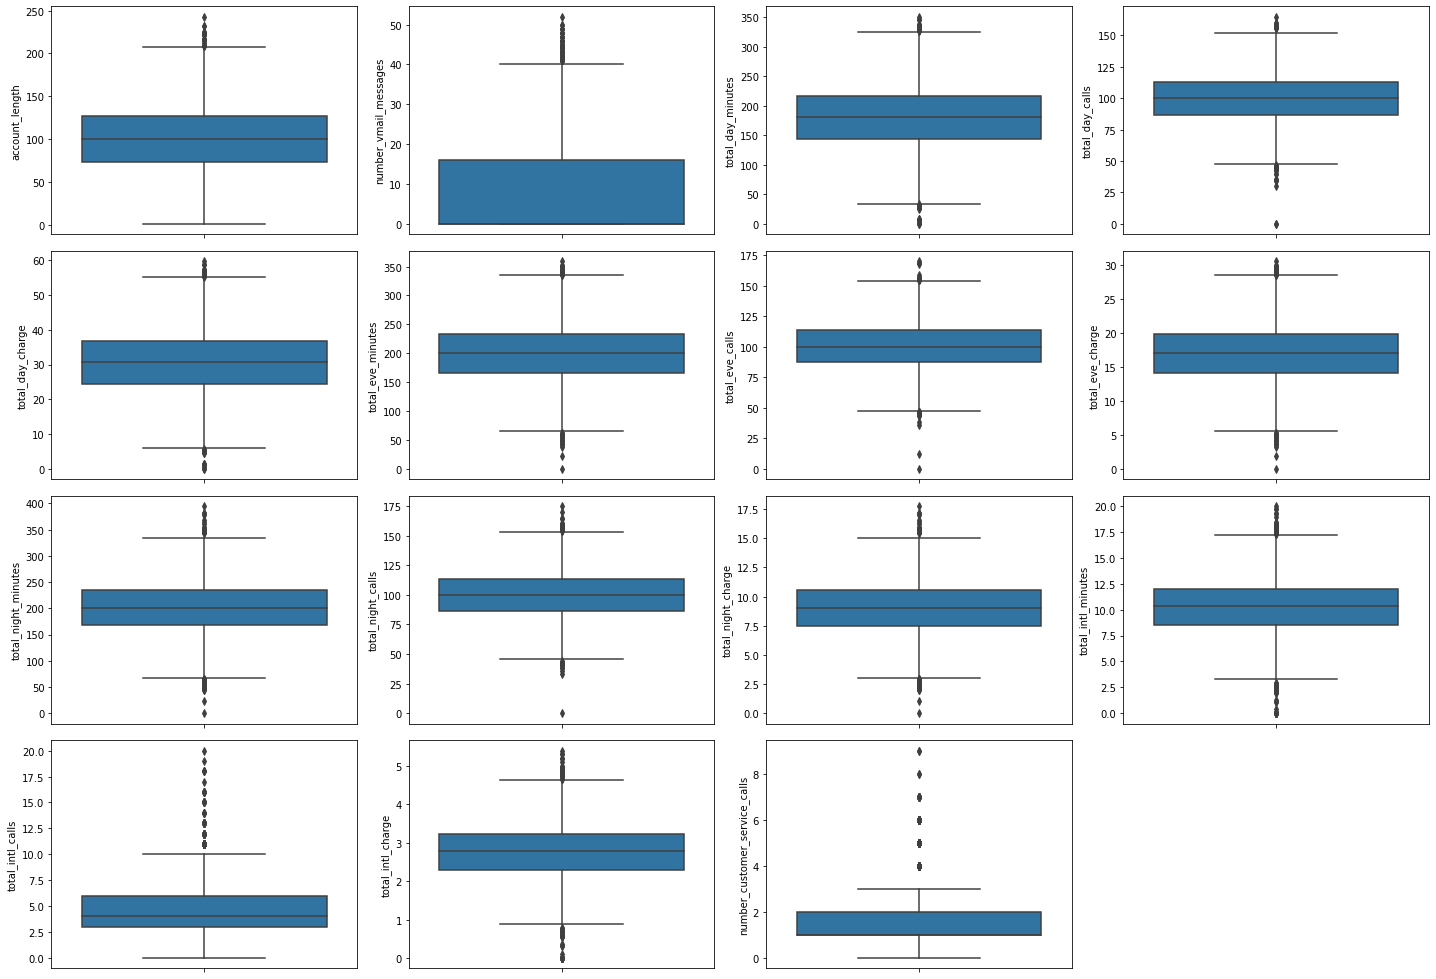

In [27]:
box_plot(df_train)

In [28]:
def dist_plot(data):
  plt.figure(figsize = (20,170))
  l_row = 50
  l_pos = 1
  for col in df_train_num:
    plt.subplot(l_row, 4, l_pos)
    sns.distplot(data[col])
    l_pos = l_pos + 1
  plt.tight_layout()
  return(plt.show())

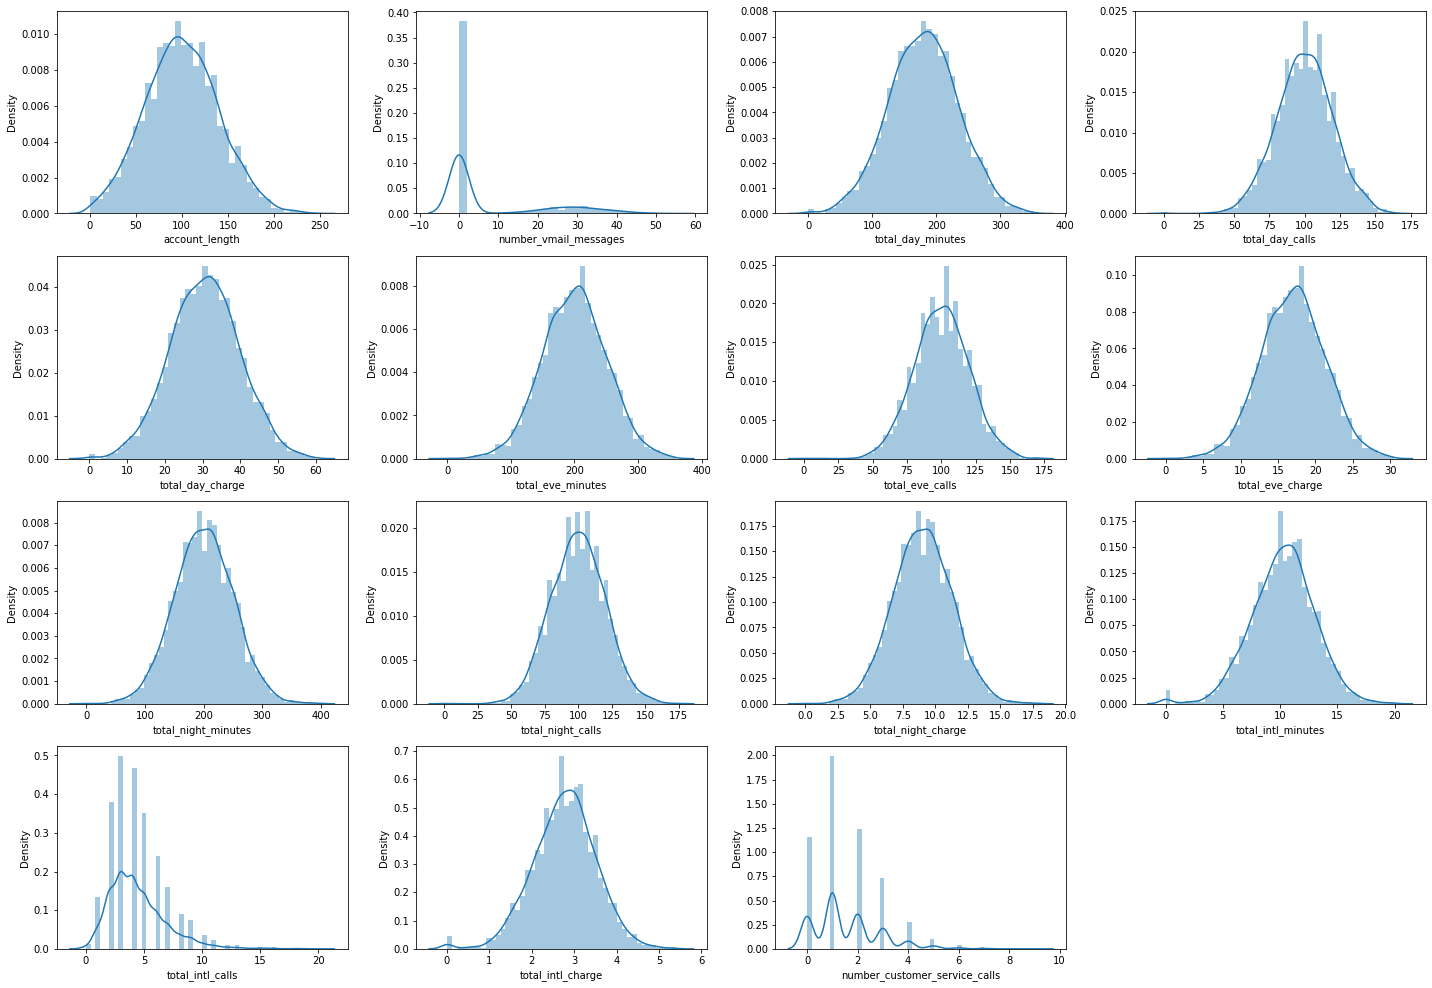

In [29]:
dist_plot(df_train)

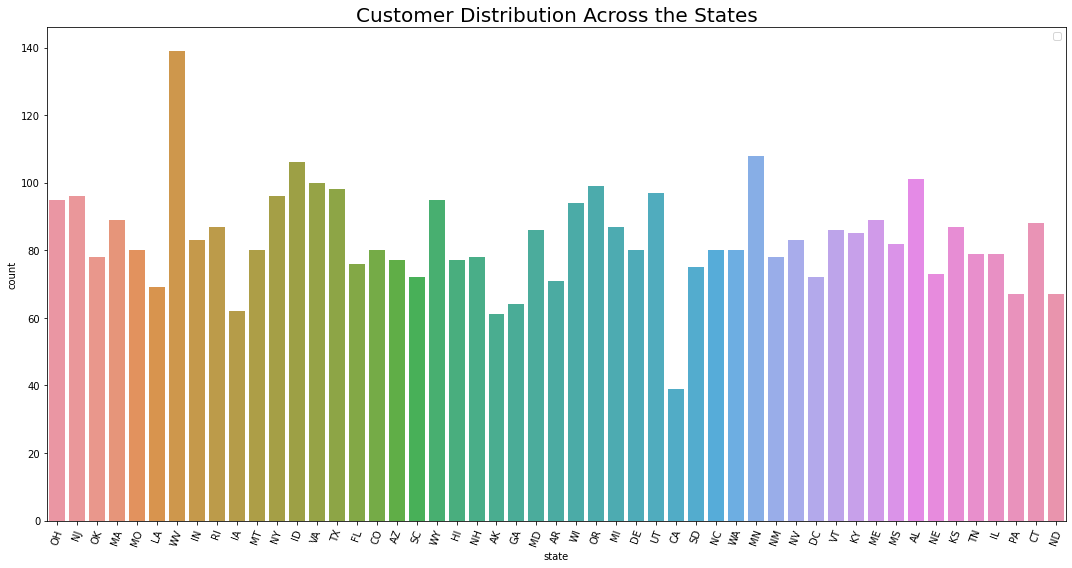

In [30]:
# Check the total disctibution of customers in all states
plt.figure(figsize = (15, 8))
sns.countplot(x = 'state', data = df_train)
plt.xticks(rotation = '70')
plt.title('Customer Distribution Across the States', fontsize = '20')
plt.legend()
plt.tight_layout()
plt.show()

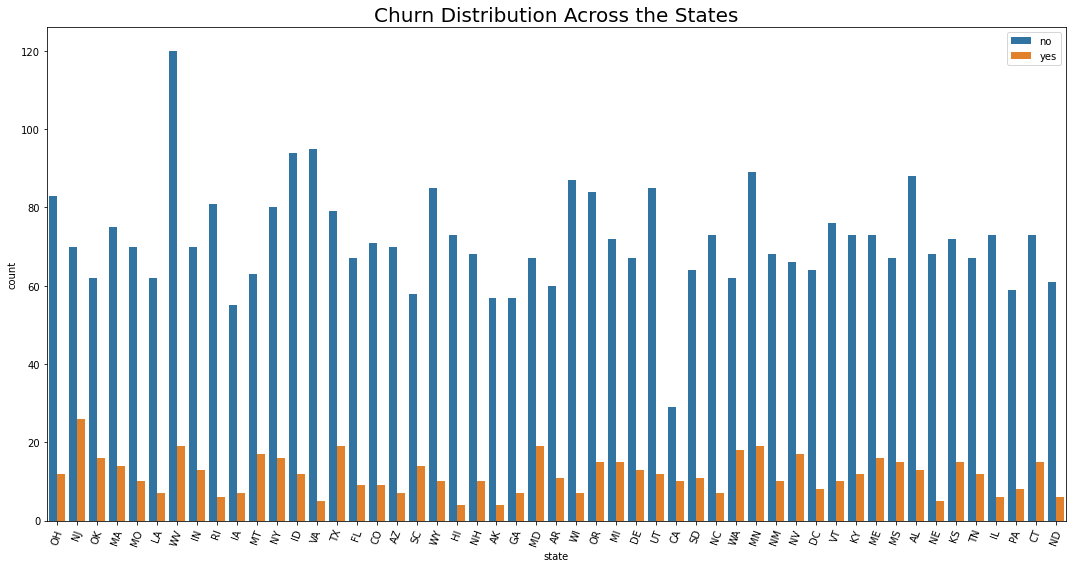

In [31]:
# Check the total distribution of churn's customers in all states
plt.figure(figsize = (15, 8))
sns.countplot(x = 'state', data = df_train, hue = 'churn')
plt.xticks(rotation = '70')
plt.title('Churn Distribution Across the States', fontsize = '20')
plt.legend()
plt.tight_layout()
plt.show()

From the previous analysis we knew the following insights:
*   There are 0.14% costumers who continuing theirs service
*   West Virginia (WV) has the highest customer in telco provider
*   New Jersey (NJ) has the highest customer who continuing theirs service, meanwhile West Virginia has the highest customer who quit theirs service
*   The customer who continuing their service has more calling the call service than the customers who quit. Maybe the telco provider can more training the call service how to retain their customers
*   The customer who continuing their service has more charge for calls than the remaining customers. Maybe telco provider has to works a effective plans to to facilitate late payments.
*   The costumers who continuing theirs service has more in area code 415 than other area code. Meanwhile the customers who quit theirs service also has more in area code 415.
*   More customers who continuing theirs service has no plan for theirs international calls. Maybe the provider can re-evaluate theirs international plan to make their customers more interested in.
*   More customers who continuing theirs service also has no plan for theirs voice mail. Maybe the provider can re-evaluate theirs voice mail plan to make their customers more interested in

The analysis of the dataset:
*   account_length, total_day_minutes, total_eve_minutes, total_night_minutes, total_intl_minutes, total_day_calls, total_eve_calls, total_night_calls has distributed normally. Meanwhile total_intl_calls and number_customer_service_calls has distributed poisson.
*   There's a lot outliner when we see in the boxplot graph. We will cap the outliers to avoide any impact on the prediction of the models.
*   We can see in the 'churn' columns that its data is imbalaced with imbalanced with 85.4% Non-Churn cases and only 14.6% Churn cases. We'will have to balanced the data so the model will not bias in the non-churn case. (For now I still have not understand yet how to balanced the data so the data not oversample or undersample, so I will skip these step)





# Data Cleaning, Cut Outliers, and Normalizing Data

So we reach the next step in build the machine learning model. As we can see before, luckliy this data is clean of missing value and duplicated data so we can skip these step.

From our EDA, there's a list we have to do in this step:
1.   Drop the total_day_charge, total_eve_charge, total_night_charge, total_intl_charge
2.   Crop the outliers
3.   Normalizing the dataset



In [32]:
#Make a copy first
df_train2 = df_train.copy()
df_test2 = df_test.copy()

In [33]:
df_train2

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,area_code_415,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,WV,73,area_code_408,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,NC,75,area_code_408,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no


In [34]:
df_test2

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,746,GA,130,area_code_415,no,no,0,119.4,99,20.30,226.3,97,19.24,202.7,111,9.12,11.3,7,3.05,0
746,747,WA,73,area_code_408,no,no,0,177.2,118,30.12,270.5,84,22.99,241.8,112,10.88,12.3,2,3.32,3
747,748,WV,152,area_code_415,no,no,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
748,749,DC,61,area_code_415,no,no,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1


In [35]:
#Drop the 'charge' columns
df_train2 = df_train2.drop(['total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge'], axis=1)
df_test2 = df_test2.drop(['total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge'], axis=1)

In [36]:
df_train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_eve_minutes              4250 non-null   float64
 9   total_eve_calls                4250 non-null   int64  
 10  total_night_minutes            4250 non-null   float64
 11  total_night_calls              4250 non-null   int64  
 12  total_intl_minutes             4250 non-null   f

In [37]:
df_test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_eve_minutes              750 non-null    float64
 10  total_eve_calls                750 non-null    int64  
 11  total_night_minutes            750 non-null    float64
 12  total_night_calls              750 non-null    int

In [38]:
df_train_num2 = df_train2.select_dtypes(include = ['float64', 'int64'])

In [39]:
#Cut the outliers
print(f'The total of rows before filtering outliers: {len(df_train2)}')

filtered_entries = np.array([True] * len(df_train2))
for col in df_train_num2:
    Q1 = df_train2[col].quantile(0.25)
    Q3 = df_train2[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df_train2[col] >= low_limit) & (df_train2[col] <= high_limit)) & filtered_entries
    
df_train3 = df_train2[filtered_entries]

print(f'The total of rows after filtering outliers: {len(df_train3)}')

The total of rows before filtering outliers: 4250
The total of rows after filtering outliers: 3516


In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
df_train_num2.columns

Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_eve_minutes', 'total_eve_calls',
       'total_night_minutes', 'total_night_calls', 'total_intl_minutes',
       'total_intl_calls', 'number_customer_service_calls'],
      dtype='object')

In [42]:
df_train_num3 = ['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_eve_minutes', 'total_eve_calls',
       'total_night_minutes', 'total_night_calls', 'total_intl_minutes',
       'total_intl_calls', 'number_customer_service_calls']

In [43]:
#Normalizing the train dataset using standart scalar
scaler = StandardScaler()
df_train3[df_train_num3] = scaler.fit_transform(df_train3[df_train_num3])
df_train3

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,churn
0,OH,0.190232,area_code_415,no,yes,1.521141,-0.351617,1.200994,-0.101193,0.152926,1.102323,0.160414,1.322916,-0.606526,-0.311121,no
1,NJ,0.957062,area_code_415,no,no,-0.553619,1.201207,0.734564,-1.619139,0.513136,-0.787696,0.211979,0.737990,0.357554,-1.336333,no
3,OK,-0.627721,area_code_415,yes,no,-0.553619,-0.254803,0.682738,-1.065488,1.130637,-0.287397,1.088581,-0.080907,-0.606526,1.739303,no
5,MO,1.212673,area_code_415,yes,no,-0.553619,-0.438940,-1.079330,-1.988922,-0.310200,0.225255,-0.200540,-1.250759,0.839595,-1.336333,no
7,WV,1.059307,area_code_415,yes,yes,2.398925,1.489752,-0.820203,0.440201,0.564594,2.584691,-0.148975,0.348039,0.357554,-1.336333,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4243,ND,1.033746,area_code_510,no,no,-0.553619,1.225886,0.786389,1.187937,0.050010,0.626730,0.624498,-1.094779,0.839595,-0.311121,yes
4245,MT,-0.423233,area_code_415,no,no,-0.553619,0.155234,-1.545760,0.885574,-0.618950,0.264373,-1.077142,-0.002917,0.839595,-1.336333,no
4246,WV,-0.678843,area_code_408,no,no,-0.553619,-0.042191,-0.561075,-1.414840,-0.927701,-0.301809,-0.561494,0.465024,0.839595,1.739303,no
4247,NC,-0.627721,area_code_408,no,no,-0.553619,-0.178870,0.060832,-0.150225,1.336471,-1.477409,0.211979,-1.328749,1.321635,-0.311121,no


In [44]:
df_test_num = ['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_eve_minutes', 'total_eve_calls',
       'total_night_minutes', 'total_night_calls', 'total_intl_minutes',
       'total_intl_calls', 'number_customer_service_calls']

In [45]:
#Normalizing the test data
df_test2[df_test_num] = scaler.fit_transform(df_test2[df_test_num])
df_test2

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls
0,1,KS,0.696065,area_code_415,no,yes,1.172240,1.590391,0.470870,-0.112333,-0.065790,0.875401,-0.488757,-0.106243,-0.613702,-0.497639
1,2,AL,0.444001,area_code_510,yes,no,-0.599015,0.806892,-0.138101,0.332531,0.037545,0.083122,0.919514,-1.442710,0.625821,-1.281734
2,3,IA,-0.967554,area_code_415,no,no,-0.599015,-1.122731,-1.559032,1.993104,-1.254136,0.065645,-0.071491,1.013500,0.625821,1.854646
3,4,VT,-0.186157,area_code_510,no,no,-0.599015,0.192494,0.673860,0.286511,0.554217,-1.359681,1.075989,-0.792537,-0.613702,1.070551
4,5,NE,1.855557,area_code_415,no,no,-0.599015,-1.055091,-1.254547,1.415931,0.605885,0.991913,0.763040,1.880397,0.212647,1.070551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,746,GA,0.746477,area_code_415,no,no,-0.599015,-1.147157,-0.087353,0.441830,-0.169124,0.059820,0.554407,0.363326,1.038996,-1.281734
746,747,WA,-0.690284,area_code_408,no,no,-0.599015,-0.061157,0.876850,1.289374,-0.840798,0.819087,0.606565,0.724534,-1.026876,1.070551
747,748,WV,1.301017,area_code_415,no,no,-0.599015,0.070366,-0.544081,1.026674,-1.409138,0.271483,0.658723,1.591432,-1.026876,1.070551
748,749,DC,-0.992760,area_code_415,no,no,-0.599015,-0.748832,-0.594829,-0.584044,1.432561,0.248180,-0.175808,1.194103,-0.200527,-0.497639


In [46]:
#Labeling the churn with no:0 and yes:1
churn_mapping = {"no": 0, "yes": 1}
df_train3['churn'] = df_train3['churn'].map(churn_mapping)

In [47]:
df_train3['churn'].value_counts()

0    3147
1     369
Name: churn, dtype: int64

# Feature Encoding

In this step we will encoding the categorial

In [48]:
df_train4=pd.get_dummies(df_train3)

In [49]:
df_train4

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,...,state_WI,state_WV,state_WY,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
0,0.190232,1.521141,-0.351617,1.200994,-0.101193,0.152926,1.102323,0.160414,1.322916,-0.606526,...,0,0,0,0,1,0,1,0,0,1
1,0.957062,-0.553619,1.201207,0.734564,-1.619139,0.513136,-0.787696,0.211979,0.737990,0.357554,...,0,0,0,0,1,0,1,0,1,0
3,-0.627721,-0.553619,-0.254803,0.682738,-1.065488,1.130637,-0.287397,1.088581,-0.080907,-0.606526,...,0,0,0,0,1,0,0,1,1,0
5,1.212673,-0.553619,-0.438940,-1.079330,-1.988922,-0.310200,0.225255,-0.200540,-1.250759,0.839595,...,0,0,0,0,1,0,0,1,1,0
7,1.059307,2.398925,1.489752,-0.820203,0.440201,0.564594,2.584691,-0.148975,0.348039,0.357554,...,0,1,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4243,1.033746,-0.553619,1.225886,0.786389,1.187937,0.050010,0.626730,0.624498,-1.094779,0.839595,...,0,0,0,0,0,1,1,0,1,0
4245,-0.423233,-0.553619,0.155234,-1.545760,0.885574,-0.618950,0.264373,-1.077142,-0.002917,0.839595,...,0,0,0,0,1,0,1,0,1,0
4246,-0.678843,-0.553619,-0.042191,-0.561075,-1.414840,-0.927701,-0.301809,-0.561494,0.465024,0.839595,...,0,1,0,1,0,0,1,0,1,0
4247,-0.627721,-0.553619,-0.178870,0.060832,-0.150225,1.336471,-1.477409,0.211979,-1.328749,1.321635,...,0,0,0,1,0,0,1,0,1,0


In [50]:
df_train4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3516 entries, 0 to 4248
Data columns (total 70 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 3516 non-null   float64
 1   number_vmail_messages          3516 non-null   float64
 2   total_day_minutes              3516 non-null   float64
 3   total_day_calls                3516 non-null   float64
 4   total_eve_minutes              3516 non-null   float64
 5   total_eve_calls                3516 non-null   float64
 6   total_night_minutes            3516 non-null   float64
 7   total_night_calls              3516 non-null   float64
 8   total_intl_minutes             3516 non-null   float64
 9   total_intl_calls               3516 non-null   float64
 10  number_customer_service_calls  3516 non-null   float64
 11  churn                          3516 non-null   int64  
 12  state_AK                       3516 non-null   u

In [51]:
df_test2.columns

Index(['id', 'state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_eve_minutes', 'total_eve_calls',
       'total_night_minutes', 'total_night_calls', 'total_intl_minutes',
       'total_intl_calls', 'number_customer_service_calls'],
      dtype='object')

In [52]:
df_test_enc = pd.get_dummies(df_test2[['state','area_code','international_plan', 'voice_mail_plan']])
df_test3 = df_test2.join(df_test_enc)
df_test3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 74 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    float64
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    float64
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    float64
 9   total_eve_minutes              750 non-null    float64
 10  total_eve_calls                750 non-null    float64
 11  total_night_minutes            750 non-null    float64
 12  total_night_calls              750 non-null    flo

In [53]:
df_test4 = df_test3.drop(['state','area_code','international_plan', 'voice_mail_plan'], axis=1)
df_test4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 70 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   account_length                 750 non-null    float64
 2   number_vmail_messages          750 non-null    float64
 3   total_day_minutes              750 non-null    float64
 4   total_day_calls                750 non-null    float64
 5   total_eve_minutes              750 non-null    float64
 6   total_eve_calls                750 non-null    float64
 7   total_night_minutes            750 non-null    float64
 8   total_night_calls              750 non-null    float64
 9   total_intl_minutes             750 non-null    float64
 10  total_intl_calls               750 non-null    float64
 11  number_customer_service_calls  750 non-null    float64
 12  state_AK                       750 non-null    uin

# Split the train test data

In [54]:
from sklearn.model_selection import train_test_split

X = df_train4.drop(["churn"], axis=1) #train data
y = df_train4["churn"] #test data

In [55]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3516 entries, 0 to 4248
Data columns (total 69 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 3516 non-null   float64
 1   number_vmail_messages          3516 non-null   float64
 2   total_day_minutes              3516 non-null   float64
 3   total_day_calls                3516 non-null   float64
 4   total_eve_minutes              3516 non-null   float64
 5   total_eve_calls                3516 non-null   float64
 6   total_night_minutes            3516 non-null   float64
 7   total_night_calls              3516 non-null   float64
 8   total_intl_minutes             3516 non-null   float64
 9   total_intl_calls               3516 non-null   float64
 10  number_customer_service_calls  3516 non-null   float64
 11  state_AK                       3516 non-null   uint8  
 12  state_AL                       3516 non-null   u

In [56]:
y

0       0
1       0
3       0
5       0
7       0
       ..
4243    1
4245    0
4246    0
4247    0
4248    0
Name: churn, Length: 3516, dtype: int64

We will split training data into 80% training and 20% test data

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 123)

# Train the model

In [58]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
from mlxtend.preprocessing import minmax_scaling
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

We'll create list of machine learning model we'll use then each model with cross validation technique k-folds to avoid overfitting. After the score is out, we'll use model based on that.

In [59]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('SVM', SVC()))
results = []
names = []
for name,model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_result = model_selection.cross_val_score(model,X_train,y_train, cv = kfold, scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
print('The score of accuracy is:')
for i in range(len(names)):
    print(names[i],results[i].mean())

The score of accuracy is:
LR 0.9110862926225991
KNN 0.9014752277832463
CART 0.931002498674945
RF 0.9494939552257641
NB 0.5753792180914161
LDA 0.8940246334014791
SVM 0.9288672673582191


As we can see, Random forest has the highest accuracy score. So we'll use random forest model, and then we'll hyperparameter tuning for Random forest.

In [60]:
chosen_model = RandomForestClassifier()
n_estimators = list(range(100, 2000, 100)) #the number of forest in the tree
max_features = ['auto', 'sqrt', 'log2']
max_depth = list(range(5, 50, 5))
criterion = ['gini', 'entropy']
min_samples_split = list(range(1,10))
min_samples_leaf = list(range(1,10))
bootstrap = [True, False]

param = {'n_estimators': n_estimators,
                 'max_features' : max_features,
                 'max_depth' : max_depth,
                 'criterion' : criterion,
                 'min_samples_split' : min_samples_split,
                 'min_samples_leaf' : min_samples_leaf,
                 'bootstrap': bootstrap}
print(param)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45], 'criterion': ['gini', 'entropy'], 'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'bootstrap': [True, False]}


In [61]:
random = RandomizedSearchCV(estimator=chosen_model, param_distributions=param, cv=3, 
                            n_jobs=-1, verbose=2, n_iter=100, random_state=42)
random.fit(X_train,y_train)
print(random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'n_estimators': 1500, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 45, 'criterion': 'gini', 'bootstrap': False}


In [62]:
best_model = RandomForestClassifier(n_estimators=1500, max_features ='auto', 
                                    max_depth=45, criterion='gini', 
                                    min_samples_split=6, min_samples_leaf=1,
                                    bootstrap=False, random_state = 42)
best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)

In [63]:
print("Accuracy Score is:")
accuracy_randomforest=accuracy_score(y_test, y_pred)
print(accuracy_randomforest)
print('\nImprovement of {:0.2f}%.'.format( 100 * (accuracy_randomforest - 0.949497741096893) / 0.949497741096893))
print('\nPrecision: %.3f' % precision_score(y_test, y_pred))
print('\nRecall: %.3f' % recall_score(y_test, y_pred))
print('\nF1 Score: %.3f' % f1_score(y_test, y_pred))

Accuracy Score is:
0.9559659090909091

Improvement of 0.68%.

Precision: 0.946

Recall: 0.547

F1 Score: 0.693


In [64]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       640
           1       0.95      0.55      0.69        64

    accuracy                           0.96       704
   macro avg       0.95      0.77      0.83       704
weighted avg       0.96      0.96      0.95       704



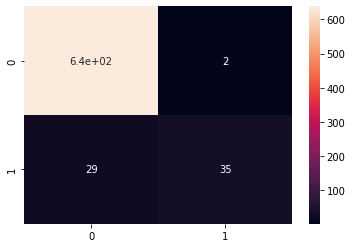

In [65]:
conf = confusion_matrix(y_test,y_pred)
label = ["0","1"]
sns.heatmap(conf, annot=True, xticklabels=label, yticklabels=label)
plt.show()

# Try the model into data test

We will use random forest classifier model into data test to predict customer's churn.

In [66]:
df_test4

,id,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,...,state_WI,state_WV,state_WY,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
0,1,0.696065,1.172240,1.590391,0.470870,-0.112333,-0.065790,0.875401,-0.488757,-0.106243,...,0,0,0,0,1,0,1,0,0,1
1,2,0.444001,-0.599015,0.806892,-0.138101,0.332531,0.037545,0.083122,0.919514,-1.442710,...,0,0,0,0,0,1,0,1,1,0
2,3,-0.967554,-0.599015,-1.122731,-1.559032,1.993104,-1.254136,0.065645,-0.071491,1.013500,...,0,0,0,0,1,0,1,0,1,0
3,4,-0.186157,-0.599015,0.192494,0.673860,0.286511,0.554217,-1.359681,1.075989,-0.792537,...,0,0,0,0,0,1,1,0,1,0
4,5,1.855557,-0.599015,-1.055091,-1.254547,1.415931,0.605885,0.991913,0.763040,1.880397,...,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,746,0.746477,-0.599015,-1.147157,-0.087353,0.441830,-0.169124,0.059820,0.554407,0.363326,...,0,0,0,0,1,0,1,0,1,0
746,747,-0.690284,-0.599015,-0.061157,0.876850,1.289374,-0.840798,0.819087,0.606565,0.724534,...,0,0,0,1,0,0,1,0,1,0
747,748,1.301017,-0.599015,0.070366,-0.544081,1.026674,-1.409138,0.271483,0.658723,1.591432,...,0,1,0,0,1,0,1,0,1,0
748,749,-0.992760,-0.599015,-0.748832,-0.594829,-0.584044,1.432561,0.248180,-0.175808,1.194103,...,0,0,0,0,1,0,1,0,1,0


Set ids as id and predict churn. 


Set the output as a dataframe and convert to csv file named result.csv

In [67]:
ids = df_test4['id']
predictions = best_model.predict(df_test4.drop(['id'], axis=1))

output = pd.DataFrame({ 'Id' : ids, 'Churn': predictions })
output.to_csv('result.csv', index=False)
output.head()

,Id,Churn
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [68]:
output.Churn.value_counts()

0    700
1     50
Name: Churn, dtype: int64

In [69]:
output.Churn.value_counts(normalize=True)

0    0.933333
1    0.066667
Name: Churn, dtype: float64

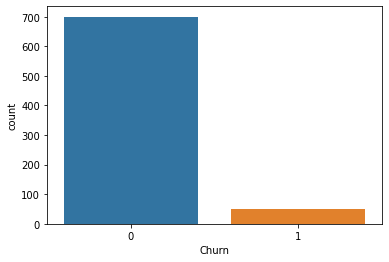

In [70]:
sns.countplot(data=output, x='Churn')